Chapter 6 - Linear Model Selection Regularization q8

## (a)

In [167]:
set.seed(1)
X = rnorm(100)
error = rnorm(100)

## (b)

In [168]:
b0=3
b1=2
b2=-4
b3=0.4
Y = b0+b1*X+b2*X^2+b3*X^3+error
sim_data = data.frame(y=Y,x=X)

## (c)

In [169]:
library(leaps)
bestsubset.fit = regsubsets(Y~poly(X,10,raw=T),data=sim_data,nvmax=10)
bestsubset_summary = summary(bestsubset.fit)
bestsubset_summary

Subset selection object
Call: regsubsets.formula(Y ~ poly(X, 10, raw = T), data = sim_data, 
    nvmax = 10)
10 Variables  (and intercept)
                       Forced in Forced out
poly(X, 10, raw = T)1      FALSE      FALSE
poly(X, 10, raw = T)2      FALSE      FALSE
poly(X, 10, raw = T)3      FALSE      FALSE
poly(X, 10, raw = T)4      FALSE      FALSE
poly(X, 10, raw = T)5      FALSE      FALSE
poly(X, 10, raw = T)6      FALSE      FALSE
poly(X, 10, raw = T)7      FALSE      FALSE
poly(X, 10, raw = T)8      FALSE      FALSE
poly(X, 10, raw = T)9      FALSE      FALSE
poly(X, 10, raw = T)10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          poly(X, 10, raw = T)1 poly(X, 10, raw = T)2 poly(X, 10, raw = T)3
1  ( 1 )  " "                   "*"                   " "                  
2  ( 1 )  "*"                   "*"                   " "                  
3  ( 1 )  "*"                   "*"                   " "                  
4  ( 1 ) 

In [170]:
names(bestsubset_summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

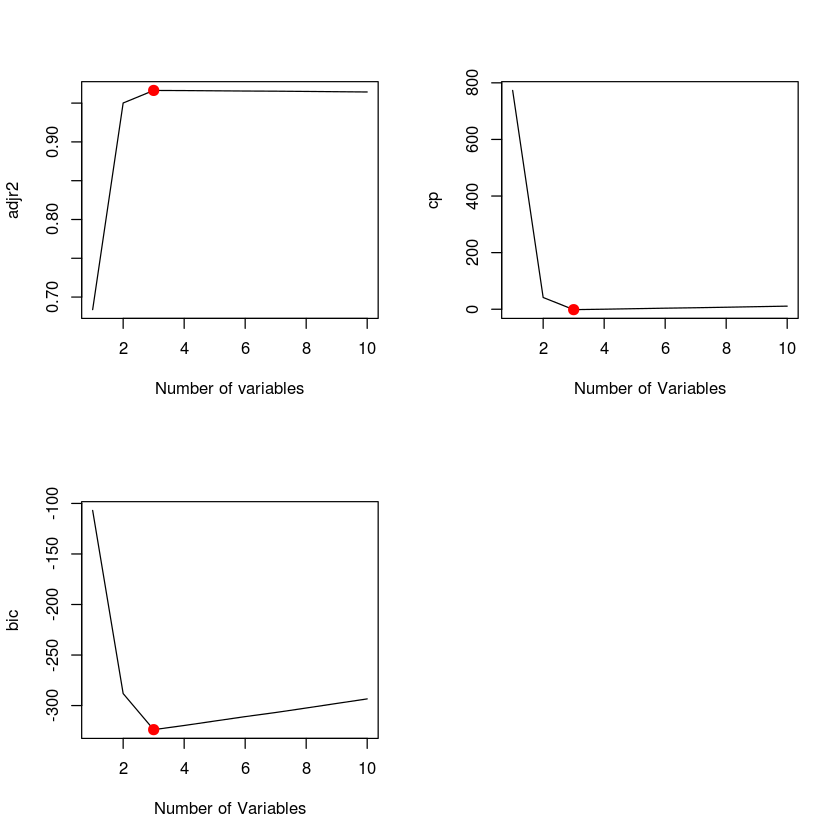

In [171]:
par(mfrow=c(2,2))
#adjusted R-squared
plot(bestsubset_summary$adjr2,xlab="Number of variables",ylab="adjr2",type="l")
max_adjr2 = which.max(bestsubset_summary$adjr2)
points(max_adjr2,bestsubset_summary$adjr2[max_adjr2],col="red",cex=2,pch=20)
#cp
plot(bestsubset_summary$cp,xlab="Number of Variables",ylab="cp",type="l")
min_cp = which.min(bestsubset_summary$cp)
points(min_cp,bestsubset_summary$cp[min_cp],col="red",cex=2,pch=20)
#bic
plot(bestsubset_summary$bic,xlab="Number of Variables",ylab="bic",type="l")
min_bic = which.min(bestsubset_summary$bic)
points(min_bic,bestsubset_summary$bic[min_bic],col="red",cex=2,pch=20)

In [172]:
max_adjr2
min_bic
min_cp

[1] 3

[1] 3

[1] 3

In [174]:
coef(bestsubset.fit,3)

(Intercept) poly(X, 10, raw = T)1 poly(X, 10, raw = T)2 
           3.07187221            2.34563538           -4.15241773 
poly(X, 10, raw = T)5 
           0.07383426

## (d)

In [176]:
#forward stepwise selection
forward.fit = regsubsets(Y~poly(x,10,raw=T),data=sim_data,nvmax=10,method="forward")
forward_summary = summary(forward.fit)
forward_summary

Subset selection object
Call: regsubsets.formula(Y ~ poly(x, 10, raw = T), data = sim_data, 
    nvmax = 10, method = "forward")
10 Variables  (and intercept)
                       Forced in Forced out
poly(x, 10, raw = T)1      FALSE      FALSE
poly(x, 10, raw = T)2      FALSE      FALSE
poly(x, 10, raw = T)3      FALSE      FALSE
poly(x, 10, raw = T)4      FALSE      FALSE
poly(x, 10, raw = T)5      FALSE      FALSE
poly(x, 10, raw = T)6      FALSE      FALSE
poly(x, 10, raw = T)7      FALSE      FALSE
poly(x, 10, raw = T)8      FALSE      FALSE
poly(x, 10, raw = T)9      FALSE      FALSE
poly(x, 10, raw = T)10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 poly(x, 10, raw = T)3
1  ( 1 )  " "                   "*"                   " "                  
2  ( 1 )  "*"                   "*"                   " "                  
3  ( 1 )  "*"                   "*"                   " "           

In [184]:
max_adjr2 = which.max(forward_summary$adjr2)
max_adjr2

[1] 3

In [185]:
min_bic = which.min(forward_summary$bic)
min_bic

[1] 3

In [186]:
min_cp = which.min(forward_summary$cp)
min_cp

[1] 3

In [187]:
coef(forward.fit,3)

(Intercept) poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 
           3.07187221            2.34563538           -4.15241773 
poly(x, 10, raw = T)5 
           0.07383426

The result of forward stepwise regression is not different from best subset regression.

In [189]:
#backward stepwise regression
backward.fit = regsubsets(Y~poly(x,10,raw=T),data=sim_data,nvmax=10,method="backward")
backward_summary = summary(backward.fit)
backward_summary

Subset selection object
Call: regsubsets.formula(Y ~ poly(x, 10, raw = T), data = sim_data, 
    nvmax = 10, method = "backward")
10 Variables  (and intercept)
                       Forced in Forced out
poly(x, 10, raw = T)1      FALSE      FALSE
poly(x, 10, raw = T)2      FALSE      FALSE
poly(x, 10, raw = T)3      FALSE      FALSE
poly(x, 10, raw = T)4      FALSE      FALSE
poly(x, 10, raw = T)5      FALSE      FALSE
poly(x, 10, raw = T)6      FALSE      FALSE
poly(x, 10, raw = T)7      FALSE      FALSE
poly(x, 10, raw = T)8      FALSE      FALSE
poly(x, 10, raw = T)9      FALSE      FALSE
poly(x, 10, raw = T)10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 poly(x, 10, raw = T)3
1  ( 1 )  " "                   "*"                   " "                  
2  ( 1 )  "*"                   "*"                   " "                  
3  ( 1 )  "*"                   "*"                   " "         

In [190]:
which.max(backward_summary$adjr2)

[1] 3

In [191]:
which.min(backward_summary$bic)

[1] 3

In [192]:
which.min(backward_summary$cp)

[1] 3

In [193]:
coef(backward.fit,3)

(Intercept) poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 
           3.07187221            2.34563538           -4.15241773 
poly(x, 10, raw = T)5 
           0.07383426

The result of backward stepwise regression is not different from best subset selection

## (e)

In [208]:
X = model.matrix(Y~poly(x,10,raw=T),data=sim_data)[,-1]
Y = sim_data[,1]
#creating a trianing data
set.seed(1)
train = sample(1:100,50)

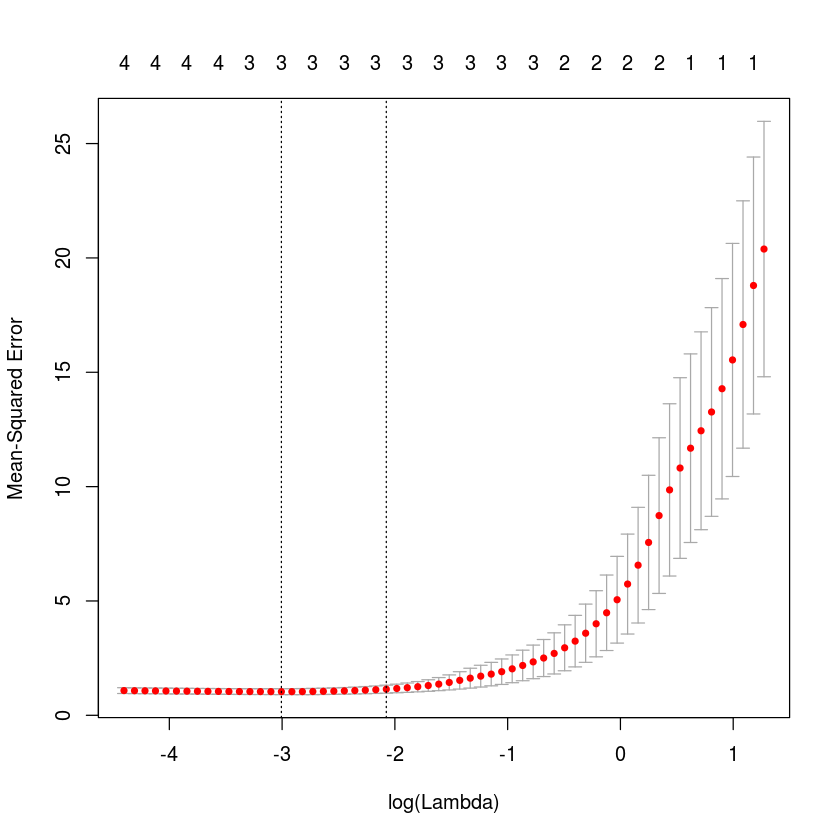

In [218]:
set.seed(1)
cv.output = cv.glmnet(X[train,],Y[train],alpha=1)
plot(cv.output)

In [228]:
best.lambda = cv.output$lambda.min
lasso.fit = glmnet(X,Y,alpha=1)
coef.pred = predict(lasso.fit,type="coefficients",s=best.lambda)[1:11,]
coef.pred

(Intercept)  poly(x, 10, raw = T)1  poly(x, 10, raw = T)2 
            3.03150152             2.25288346            -4.09202423 
 poly(x, 10, raw = T)3  poly(x, 10, raw = T)4  poly(x, 10, raw = T)5 
            0.06479257             0.00000000             0.05902684 
 poly(x, 10, raw = T)6  poly(x, 10, raw = T)7  poly(x, 10, raw = T)8 
            0.00000000             0.00000000             0.00000000 
 poly(x, 10, raw = T)9 poly(x, 10, raw = T)10 
            0.00000000             0.00000000

In [227]:
coef.pred[coef.pred!=0]

(Intercept) poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 
           3.03150152            2.25288346           -4.09202423 
poly(x, 10, raw = T)3 poly(x, 10, raw = T)5 
           0.06479257            0.05902684

The Lasso has picked the variables x^1,x^2,x^3 and x^5

## (f)

In [229]:
b0=4
b7=8
Y = b0 + b7*X^7 + error
sim_data = data.frame(y=Y,x=X)

In [232]:
#using best subset selection
best.subset.fit = regsubsets(Y~poly(x,10,raw=T),data=sim_data,nvmax=10)
best.subset.summary = summary(best.subset.fit)
names(best.subset.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [233]:
which.min(best.subset.summary$cp)

[1] 2

In [234]:
which.min(best.subset.summary$bic)

[1] 1

In [238]:
which.max(best.subset.summary$adjr2)

[1] 4

The best subset selection produces the following models according to cp,bic and adjusted R-squared

In [240]:
coef(best.subset.fit,2)

(Intercept) poly(x, 10, raw = T)2 poly(x, 10, raw = T)7 
            4.0704904            -0.1417084             8.0015552

In [241]:
coef(best.subset.fit,1)

(Intercept) poly(x, 10, raw = T)7 
              3.95894               8.00077

In [242]:
coef(best.subset.fit,4)

(Intercept) poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 
            4.0762524             0.2914016            -0.1617671 
poly(x, 10, raw = T)3 poly(x, 10, raw = T)7 
           -0.2526527             8.0091338

In [252]:
#using lasso
b0=4
b7=8
Y = b0 + b7*X^7 + error
sim_data = data.frame(y=Y,x=X)
X = model.matrix(Y~poly(x,10,raw=T),data=sim_data)[,-1]
Y = sim_data[,1]
#creating training data
set.seed(1)
train = sample(1:100,50)

In [253]:
cv.output = cv.glmnet(X[train,],Y[train],alpha=1)
best.lambda=cv.output$lambda.min
best.lambda

[1] 18.53138

In [254]:
lasso.fit = glmnet(X,Y,alpha=1)
coef.pred = predict(lasso.fit,type="coefficients",s=best.lambda)[1:11,]
coef.pred

(Intercept)  poly(x, 10, raw = T)1  poly(x, 10, raw = T)2 
              5.249328               0.000000               0.000000 
 poly(x, 10, raw = T)3  poly(x, 10, raw = T)4  poly(x, 10, raw = T)5 
              0.000000               0.000000               0.000000 
 poly(x, 10, raw = T)6  poly(x, 10, raw = T)7  poly(x, 10, raw = T)8 
              0.000000               7.695017               0.000000 
 poly(x, 10, raw = T)9 poly(x, 10, raw = T)10 
              0.000000               0.000000

However the lasso produces the following one model with only one variable x^7 which is similar to the original model.

In [255]:
coef.pred[coef.pred!=0]

(Intercept) poly(x, 10, raw = T)7 
             5.249328              7.695017